PYTHON PROJECT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as cb
from scipy import stats as st


In [2]:
# Load Data
df = pd.read_csv("Active_Cigarette_Tobacco_Retailers.csv")
print(df)
print("############")


                       id  Taxpayer ID                         Taxpayer Name  \
0      111371519470000259  11137151947               SHANE ENTERPRISES, INC.   
1      103052510340003859  10305251034                 KUIFS PETROLEUM, L.P.   
2      120186788590000109  12018678859                 AMITY ENTERPRISES LLC   
3      103052510340004109  10305251034                 KUIFS PETROLEUM, L.P.   
4      103047941250000359  10304794125                      BAWA CORPORATION   
...                   ...          ...                                   ...   
59396  352952952950000209  35295295295  HEALTH AND HUMAN SERVICES COMMISSION   
59397  390000128880000109  39000012888                         JUAN A PORRAS   
59398  390000159640000109  39000015964                      BENNIE L MCGRIFF   
59399  390000956690000109  39000095669                        JOHN ALIHEMATI   
59400  390001477340001009  39000147734                HERLINDA MENCIA VARELA   

                        Location Name  

In [3]:
# Explore the data
print(df.head())
print("############")
print(df.describe())
print("############")
print(df.info())
print("############")
print(df.nunique())
print("############")
print(df.columns)
print("############")

                   id  Taxpayer ID            Taxpayer Name  \
0  111371519470000259  11137151947  SHANE ENTERPRISES, INC.   
1  103052510340003859  10305251034    KUIFS PETROLEUM, L.P.   
2  120186788590000109  12018678859    AMITY ENTERPRISES LLC   
3  103052510340004109  10305251034    KUIFS PETROLEUM, L.P.   
4  103047941250000359  10304794125         BAWA CORPORATION   

          Location Name                    Address        City State    Zip  \
0  LEWISVILLE BEVERAGES         101 S STEMMONS FWY  LEWISVILLE    TX  75067   
1                KS #36    21110 STATE HIGHWAY 249     HOUSTON    TX  77070   
2  SUPERMERCADO POPULAR  8621 W AIRPORT BLVD STE D     HOUSTON    TX  77071   
3          CHECKOUT #41   21480 FAIRFIELD PLACE DR     CYPRESS    TX  77433   
4            BAWA SHELL    5607 E R L THORNTON FWY      DALLAS    TX  75223   

    Zip+4  County  Location Number       Permit Type  Permit Number  \
0  4509.0  DENTON                2    E-CIG RETAILER     22000105.0   
1  1

In [4]:
# Handle missing data
print(df.isnull().sum())
print("############")
print(df.dropna())
print("############")


id                      0
Taxpayer ID             0
Taxpayer Name           0
Location Name           0
Address                 0
City                    0
State                   0
Zip                     0
Zip+4                6353
County                 26
Location Number         0
Permit Type             0
Permit Number           2
Permit Begin Date       0
dtype: int64
############
                       id  Taxpayer ID                         Taxpayer Name  \
0      111371519470000259  11137151947               SHANE ENTERPRISES, INC.   
1      103052510340003859  10305251034                 KUIFS PETROLEUM, L.P.   
2      120186788590000109  12018678859                 AMITY ENTERPRISES LLC   
3      103052510340004109  10305251034                 KUIFS PETROLEUM, L.P.   
4      103047941250000359  10304794125                      BAWA CORPORATION   
...                   ...          ...                                   ...   
59396  352952952950000209  35295295295  HEALTH AND

                       id  Taxpayer ID       Zip     Zip+4  Location Number  \
id               1.000000     1.000000 -0.106559 -0.011409        -0.377482   
Taxpayer ID      1.000000     1.000000 -0.106559 -0.011409        -0.377482   
Zip             -0.106559    -0.106559  1.000000 -0.006535         0.107738   
Zip+4           -0.011409    -0.011409 -0.006535  1.000000         0.029689   
Location Number -0.377482    -0.377482  0.107738  0.029689         1.000000   
Permit Number   -0.055607    -0.055607  0.020981 -0.007159        -0.042767   

                 Permit Number  
id                   -0.055607  
Taxpayer ID          -0.055607  
Zip                   0.020981  
Zip+4                -0.007159  
Location Number      -0.042767  
Permit Number         1.000000  
############


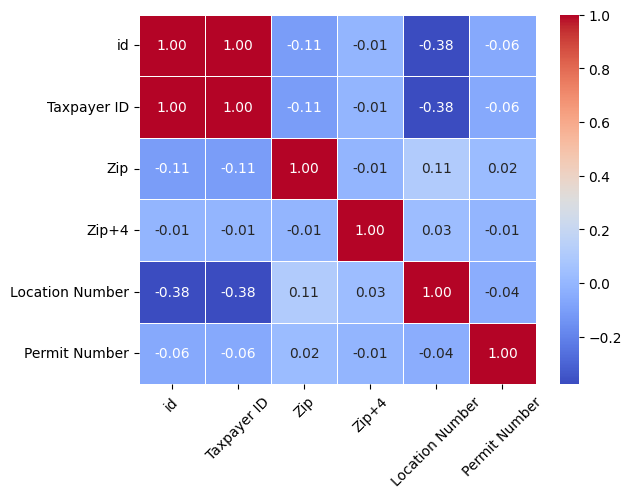

In [5]:
# Correlation
corre = df.corr(numeric_only=True)
print(corre)
print("############")
cb.heatmap(corre, cmap="coolwarm", annot=True, linewidths=0.5, fmt=".2f")
plt.xticks(rotation=45)
plt.show()


In [6]:
# Covariance
cov = df.cov(numeric_only=True)
print(cov)
print("############")


                           id   Taxpayer ID           Zip         Zip+4  \
id               5.400557e+33  5.400557e+26 -1.203665e+19 -1.755656e+18   
Taxpayer ID      5.400557e+26  5.400557e+19 -1.203665e+12 -1.755656e+11   
Zip             -1.203665e+19 -1.203665e+12  2.362611e+06 -2.162502e+04   
Zip+4           -1.755656e+18 -1.755656e+11 -2.162502e+04  4.583727e+06   
Location Number -2.031566e+19 -2.031566e+12  1.212771e+05  4.547542e+04   
Permit Number   -5.908132e+22 -5.908132e+15  4.662520e+08 -1.784205e+08   

                 Location Number  Permit Number  
id                 -2.031566e+19  -5.908132e+22  
Taxpayer ID        -2.031566e+12  -5.908132e+15  
Zip                 1.212771e+05   4.662520e+08  
Zip+4               4.547542e+04  -1.784205e+08  
Location Number     5.363282e+05  -4.528201e+08  
Permit Number      -4.528201e+08   2.090256e+14  
############


id                 1.752034e+17
Taxpayer ID        1.752034e+10
Zip                7.606700e+04
Zip+4              2.611000e+03
Location Number    1.000000e+00
Permit Number      1.800131e+07
Name: 0.25, dtype: float64
############
id                 3.208005e+17
Taxpayer ID        3.208005e+10
Zip                7.823100e+04
Zip+4              5.760000e+03
Location Number    2.600000e+01
Permit Number      2.300631e+07
Name: 0.75, dtype: float64
############
id                 1.455971e+17
Taxpayer ID        1.455971e+10
Zip                2.164000e+03
Zip+4              3.149000e+03
Location Number    2.500000e+01
Permit Number      5.005002e+06
dtype: float64
##########
id                -4.319227e+16
Taxpayer ID       -4.319227e+09
Zip                7.282100e+04
Zip+4             -2.112500e+03
Location Number   -3.650000e+01
Permit Number      1.049380e+07
dtype: float64
############
id                 5.391961e+17
Taxpayer ID        5.391961e+10
Zip                8.147700e+04
Zi

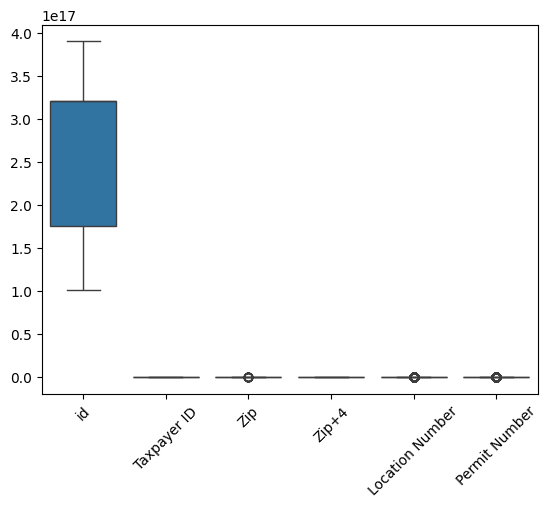

In [7]:

# Outlier Detection using IQR
num = df.select_dtypes(include=['number']).columns
q1 = df[num].quantile(0.25)
print(q1)
print("############")
q3 = df[num].quantile(0.75)
print(q3)
print("############")
iqr = q3 - q1
print(iqr)
print("##########")
lb = q1 - 1.5 * iqr
print(lb)
print("############")
ub = q3 + 1.5 * iqr
print(ub)
print("############")
out = (df[(df[num] < lb) | (df[num] > ub)]).sum()
print(out)
print("############")
cb.boxplot(df[num])
plt.xticks(rotation=45)
plt.show()

In [8]:
# Outlier Detection using Z-Score
score = st.zscore(df[num], nan_policy='omit')
out1 = (abs(score) > 3).sum(axis=0)
print(out1)
print("############")


id                    0
Taxpayer ID           0
Zip                  23
Zip+4                 0
Location Number    2029
Permit Number      1915
dtype: int64
############


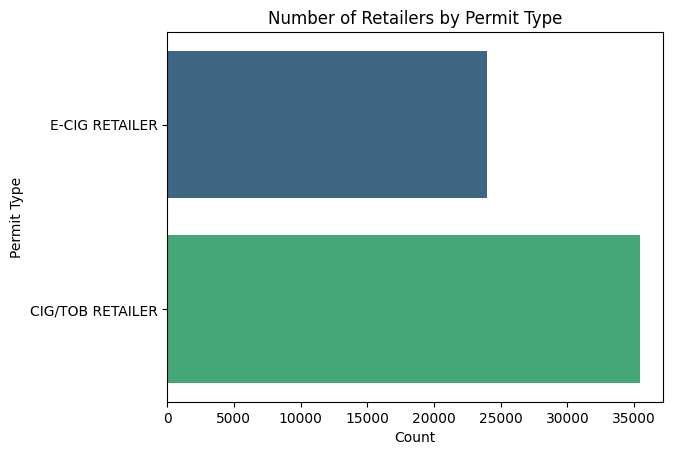

In [9]:

# Visualization 1: Retailers by Permit Type
cb.countplot(y="Permit Type", hue="Permit Type", data=df, palette="viridis", legend=False)
plt.title("Number of Retailers by Permit Type")
plt.xlabel("Count")
plt.ylabel("Permit Type")
plt.show()

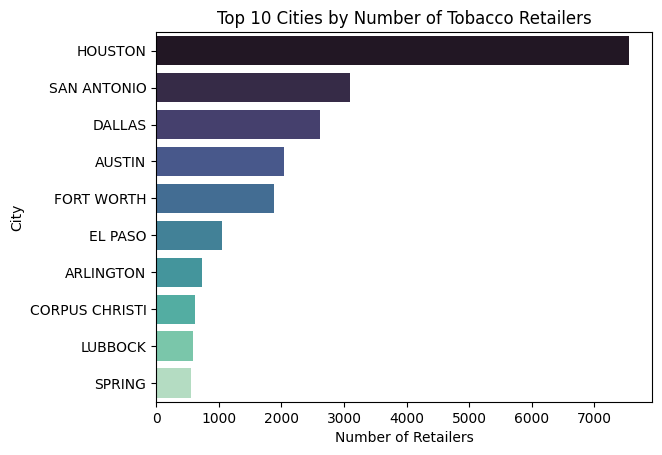

In [10]:

# Visualization 2: Top 10 Cities with Most Tobacco Retailers
top_cities = df['City'].value_counts().nlargest(10)
cb.barplot(x=top_cities.values, y=top_cities.index, hue=top_cities.index, palette="mako", legend=False)
plt.title("Top 10 Cities by Number of Tobacco Retailers")
plt.xlabel("Number of Retailers")
plt.ylabel("City")
plt.show()

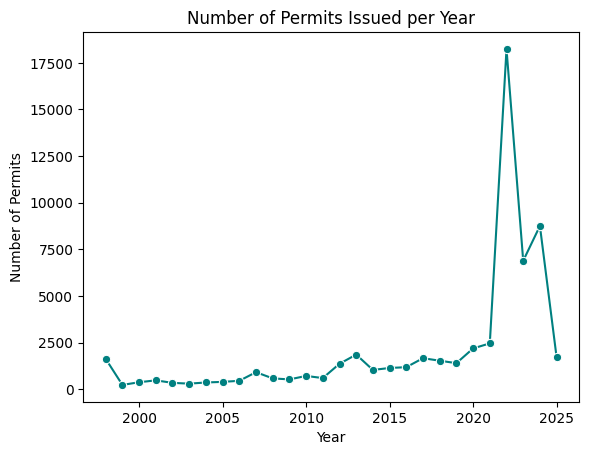

In [11]:

# Visualization 3: Permit Trends Over Time
df['Permit Begin Date'] = pd.to_datetime(df['Permit Begin Date'], errors='coerce')
df['Permit Year'] = df['Permit Begin Date'].dt.year
permits_by_year = df['Permit Year'].value_counts().sort_index()
cb.lineplot(x=permits_by_year.index, y=permits_by_year.values, marker="o", color="teal")
plt.title("Number of Permits Issued per Year")
plt.xlabel("Year")
plt.ylabel("Number of Permits")
plt.show()

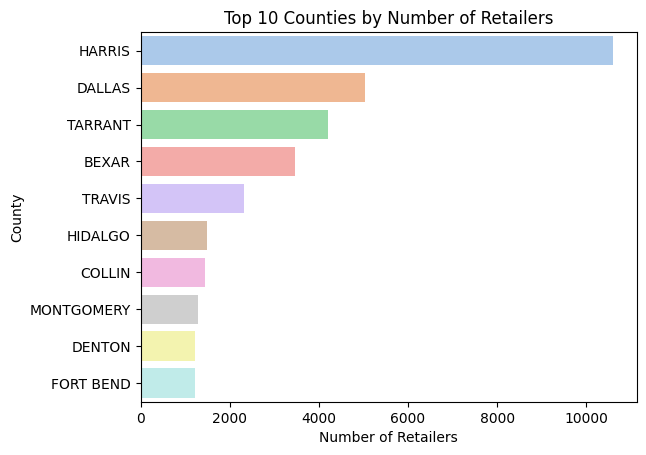

In [12]:
# Visualization 4: Retailers by County (Top 10)
top_counties = df['County'].value_counts().nlargest(10)
cb.barplot(x=top_counties.values, y=top_counties.index, hue=top_counties.index, palette="pastel", legend=False)
plt.title("Top 10 Counties by Number of Retailers")
plt.xlabel("Number of Retailers")
plt.ylabel("County")
plt.show()



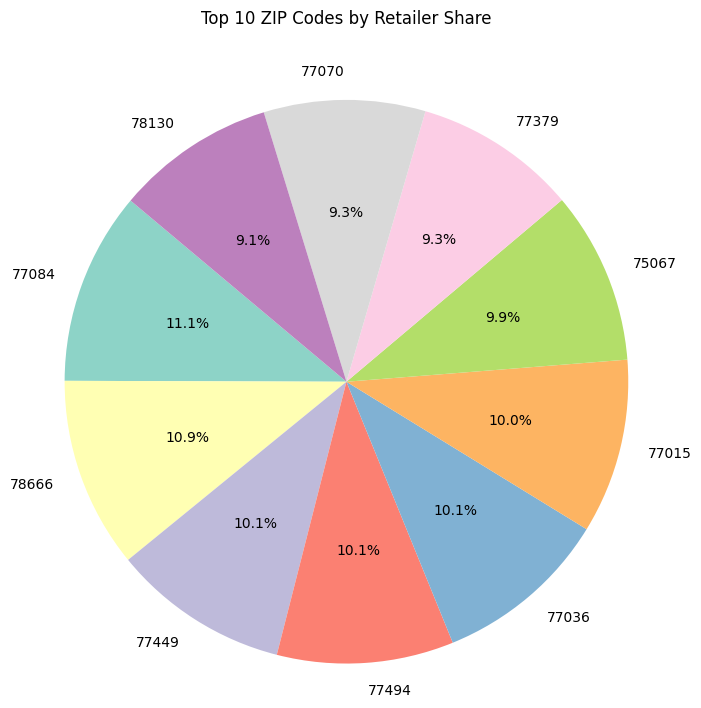

In [13]:
# Visualization 5: Top 10 ZIP Codes by Share of Retailers
top_zips = df['Zip'].value_counts().nlargest(10)
plt.figure(figsize=(8, 8))
plt.pie(top_zips.values, labels=top_zips.index.astype(str), autopct='%1.1f%%', startangle=140, colors=cb.color_palette("Set3"))
plt.title("Top 10 ZIP Codes by Retailer Share\n\n")
plt.axis('equal')
plt.show()